In [The Mean and Slopes](mean_and_slopes), we were looking for the best slope
to predict one vector of values from another vector of values.

Specifically, we wanted our slope to predict the Packed Cell Volume (PCV)
values from the Hemoglobin (HGB) values.

By analogy with [The Mean as Predictor](mean_meaning), we decided to choose our
line to minimize the average prediction errors, and the sum of squared
prediction errors.

We found a solution, by trying many slopes, and choosing the slope giving use
the smallest error.

For our question, we were happy to assume that the line passed through 0,
0 - meaning, that when the Hemoglobin is 0, the Packed Cell Volume value is 0.
Put another way, we assumed that our line had an *intercept* value of 0.  The
intercept is the y value at which the line crosses the y axis, or, put another
way, the y value when the x value is 0.

What if we are in a situation where we want to find a line that had a (not
zero) intercept, as well as a slope?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 4 decimal places, show tiny values as 0
np.set_printoptions(precision=4, suppress=True)

We return to the [students ratings dataset]({{ site.baseurl }}/data/rate_my_professors) dataset.

This is a dataset, in Excel form, where each row is the average of students'
ratings from <RateMyProfessors.com> across a single subject.  Thus, the first
row refers to the average of all professors teaching English, the second row
refers to all professors teaching Mathematics, and so on.

Download the data file via this link [disciplines_SI.xlsx]({{ site.baseurl
}}/data/disciplines_SI.xlsx).

Next we load the data.  Notice we are using the Pandas
[read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
function to read this Excel spreadsheet.

In [2]:
# Read the Excel format data file
ratings = pd.read_excel('disciplines_SI.xlsx')
ratings.head()

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
0,English,23343,3.756147,3.821866,3.791364,3.162754
1,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
2,Biology,11774,3.608331,3.701530,3.657641,2.710459
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
4,History,11145,3.788818,3.753642,3.773746,3.053803


We are interested in the relationship of the "Overall Quality" measure to the
"Easiness" measure.

In [3]:
# Convert Easiness and Overall Quality measures to arrays.
easiness = np.array(ratings['Easiness'])
quality = np.array(ratings['Overall Quality'])

Do students rate easier courses as being of better quality?

Text(0, 0.5, 'Overall Quality')

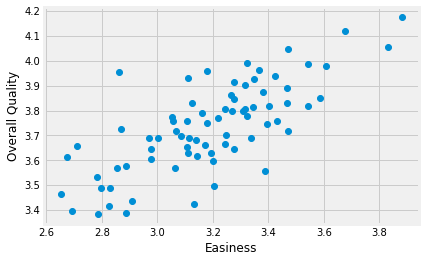

In [4]:
plt.plot(easiness, quality, 'o')
plt.xlabel('Easiness')
plt.ylabel('Overall Quality')

There might be a straight-line relationship here, but it doesn't look as if it
would go through 0, 0:

[0, 3.9, 0, 4.2]

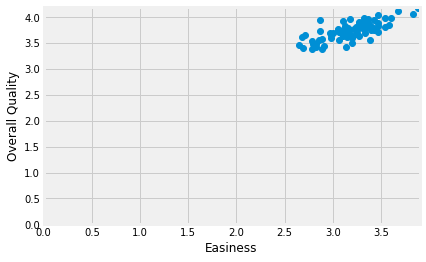

In [5]:
# The same plot as above, but showing the x, y origin at 0, 0
plt.plot(easiness, quality, 'o')
plt.xlabel('Easiness')
plt.ylabel('Overall Quality')
# Make sure 0, 0 is on the plot.
plt.axis([0, 3.9, 0, 4.2])

In [The Mean and Slopes](mean_and_slopes), we assumed that the intercept was zero, so we only had to try different slopes to get our best line.

Here we have a different problem, because we want to find a line that has an
intercept that is not zero, so we need to find the *best slope* and the *best
intercept* at the same time.  How do we search for a slope as well as an
intercept?

To be more formal, we describe the line with an *intercept* $c$ and a *slope*
$s$.  A line predicts the $y$ values from the $x$ values, using the slope $s$
and the intercept $c$:

$$
y = c + x * s
$$

Let's say we guess that:

In [6]:
# Intercept and slope for guessed line
c_guess = 2.25
s_guess = 0.47

The *predicted* $y$ values from this line are (from the formula above):

In [7]:
predicted = c_guess + easiness * s_guess

where `easiness` contains our actual $x$ values.

The prediction error at each point come from the actual $y$ values minus the
predicted $y$ values.

In [8]:
error = quality - predicted

where `quality` contains our actual $y$ values.

The sum of squared errors is:

In [9]:
# Sum of squared error given c and s
sse_c_s = np.sum(error ** 2)
sse_c_s

1.0849912187001691

We want to find the *pair of values* --- `c` and `s`  --- such that we get the
smallest possible value for `sse_c_s` above.

First we define a function, that gives the sum of squared error from our line, defined by the intercept, slope pair.


In [10]:
def sos_error_c_s(c, s):
    predicted = c + easiness * s
    error = quality - predicted
    return np.sum(error ** 2)

Here we pass the new function our guessed intercept and slope function to confirm we get the same answer as we did before:

In [11]:
sos_error_c_s(c_guess, s_guess)

1.0849912187001691

We can try other values for the intercept and slope to see if we can make the
sum of squared error go down:

In [12]:
sos_error_c_s(2.2, 0.48)

1.0751749908632549

In [Mean and Slopes](mean_and_slopes), we found the best slope by trying lots
of slopes and choosing the one the gave the minimum sum of squares. What do we
do when we are trying to find the best slope *and* the best intercept at the same time?

We can do the same thing as we did when we were just looking for the slope, but
this time, instead of searching over many slopes, we search over many
*combinations* of slopes and intercepts.

In [13]:
# Some slopes and intercepts to try
some_intercepts = np.arange(1, 3.2, 0.01)
n_intercepts = len(some_intercepts)
print('Number of intercepts to try:', n_intercepts)
some_slopes = np.arange(0.2, 0.8, 0.001)
n_slopes = len(some_slopes)
print('Number of slopes to try:', n_slopes)

Number of intercepts to try: 220
Number of slopes to try: 601


When we searched many slopes, we collected the errors in a one-dimensional
array, with each element carrying the error for a single slope.  For example,
if we are trying 601 slopes, we make a one-dimensional array of length 601, to
store the matching error values.

Now we are going to search for many slopes and many intercepts.  We need a
two-dimensional array, where the rows (say) correspond to the different
intercept values we try, and the columns (say) correspond to the slope values
we try.  If we try 220 intercepts and 601 slopes, we need a two-dimensional
array shape (220, 601) to store the corresponding errors.

For each of the 220 possible intercepts, we try all 601 possible slopes.  We
fill in the corresponding values in the array, to have 220 * 601 sum of squared
error values, for the 220 * 601 possible pairs of intercept and slope.

In [14]:
# Make the two-dimensional array to store the errors.
ss_errors = np.zeros((n_intercepts, n_slopes))
# Try all possible intercepts
for inter_i in np.arange(n_intercepts):
    c = some_intercepts[inter_i]
    # For each intercept, try all possible slopes
    for slope_i in np.arange(n_slopes):
        s = some_slopes[slope_i]
        # Fill the corresponding position in the error array
        ss_errors[inter_i, slope_i] = sos_error_c_s(c, s)

We now have the error for all pair of intercepts and slopes.  We can display
this as an array, to see where the minimum might be.  The smallest values will
be blue, the largest will be red:

Text(0.5, 1.0, 'Sum of squared error')

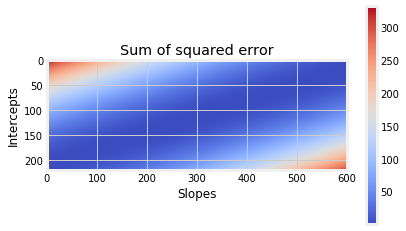

In [15]:
# Show the error array as an image.
# Blue corresponds to low values, red to high values.
plt.imshow(ss_errors, cmap='coolwarm')
plt.colorbar()
plt.ylabel('Intercepts')
plt.xlabel('Slopes')
plt.title('Sum of squared error')

At the moment, it's a bit difficult to see what's going on, because the lowest
point in the center is in a lake of undifferentiated blue.  We can make it
easier to see by setting the very high values to be transparent, showing only
the smaller values.  The details of this plotting code are not important.

Text(0.5, 1.0, 'Sum of squared error')

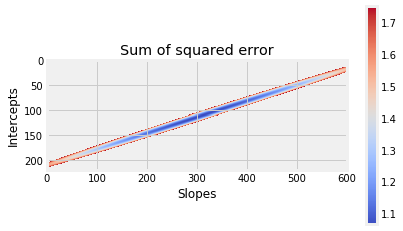

In [16]:
# The same plot as above, but removing the very high sum of squares values.
# Set all sum of square values above 1.75 to be above threshold.
img = plt.imshow(ss_errors, cmap='coolwarm', vmax=1.75)
# Set above threshold values to be transparent.
img.cmap.set_over([0, 0, 0, 0])
plt.colorbar()
plt.ylabel('Intercepts')
plt.xlabel('Slopes')
plt.title('Sum of squared error')

We can display this as a 3D surface, to get a better idea of where the minimum
is.  Don't worry about the specific code below, we don't often need these kinds
of plots in data analysis.

Text(0.5, 0.92, 'Sum of squared error')

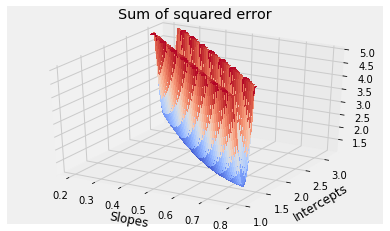

In [17]:
# Display sum of squared errors as surface.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(some_slopes, some_intercepts)
# Make values above 5 transparent.
mx = 5
surf = ax.plot_surface(X, Y,
                       np.clip(ss_errors, 0, mx),
                       cmap='coolwarm',
                       vmax=mx-0.01,
                       linewidth=0, antialiased=False)
img.cmap.set_over([0, 0, 0, 0])
plt.ylabel('Intercepts')
plt.xlabel('Slopes')
plt.title('Sum of squared error')

The minimum over all pairs of intercepts and slopes is at the bottom of the
blue trough in the plot.  Looking at the plot and the axes, it seems that the best intercept, slope pair is around 2.2 and 0.5.

We find the smallest error from the whole array:

In [18]:
min_error = np.min(ss_errors)
min_error

1.0675058315271388

Notice that this error is lower than the error we found for our guessed `c` and
`s`:

In [19]:
sos_error_c_s(c_guess, s_guess)

1.0849912187001691

Using the tricks from [where and argmin](where_and_argmin), we find the row and
column indices for the minimum value:

In [20]:
rows, cols = np.where(ss_errors == min_error)
rows, cols

(array([112]), array([307]))

We can now get the corresponding intercept and slope pair:

In [21]:
# The intercept giving the minimum error (with the slope below).
best_c = some_intercepts[rows]
best_c

array([2.12])

In [22]:
# The slope giving the minimum error (with the intercept above).
best_s = some_slopes[cols]
best_s

array([0.507])

We calculate the predicted values for our new best line:

In [23]:
si_predicted = best_c + easiness * best_s

Plot the data, predictions and errors for the line that minimizes the sum of
squared error:

Text(0.5, 1.0, 'The best-fit line using least-squared error')

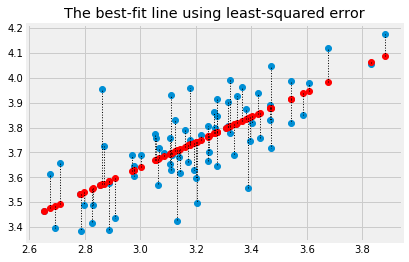

In [24]:
plt.plot(easiness, quality, 'o')
plt.plot(easiness, si_predicted, 'o', color='red')
for i in np.arange(len(easiness)):
    x = easiness[i]
    y_0 = si_predicted[i]
    y_1 = quality[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)
plt.title('The best-fit line using least-squared error')

Now you know about [optimization](optimization), you will not be surprised to
discover that Scipy `minimize` can also do the search for the intercept and
slope pair for us.  We send `minimize` the function we are trying to minimize,
and a starting guess for the intercept and slope.

`minimize` is a little fussy about the functions it will use.  It insists that all the parameters need to be passed in as a single argument.   In our case, we need to pass both parameters (the intercept and slope) as one value, containing two elements, like this:

In [25]:
def sos_error_for_minimize(c_s):
    # c_s has two elements, the intercept c and the slope s.
    c = c_s[0]
    s = c_s[1]
    predicted = c + easiness * s
    error = quality - predicted
    return np.sum(error ** 2)

This is the form of the function that minimize can use.

We first confirm this gives us the same answer we got before from our function with two arguments:

In [26]:
# The original function
sos_error_c_s(2.25, 0.47)

1.0849912187001691

In [27]:
# The function in the form that minimize wants
# The two parameters go into a list, that we can pass as a single argument.
sos_error_for_minimize([2.25, 0.47])

1.0849912187001691

As usual with `minimize` we need to give a starting guess for the intercept and
slope.  We will start with our initial guess of `[2.25, 0.47]`, but any
reasonable guess will do.

In [28]:
from scipy.optimize import minimize
minimize(sos_error_for_minimize, [2.25, 0.47])

      fun: 1.0674471058042072
 hess_inv: array([[ 0.9878, -0.308 ],
       [-0.308 ,  0.0967]])
      jac: array([-0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.1148, 0.5089])

We won't spend any time justifying this, but this is also the answer we get
from traditional fitting of the least-squares line, as implemented, for
example, in the Scipy `linregress` function:

In [29]:
from scipy.stats import linregress
linregress(easiness, quality)

LinregressResult(slope=0.5088641203940006, intercept=2.114798571643314, rvalue=0.7459725836595872, pvalue=1.5998303978986516e-14, stderr=0.053171209477256925)

Notice the values for `slope` and `intercept` in the output above.